In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Chargement de la data

In [2]:
# Utilisation du dataset iris de sklearn
iris = datasets.load_iris()

# On récupère les features
iris_X = iris.data

# On récupère les labels
iris_y = iris.target

## Affichage du dataset selon trois paramètres

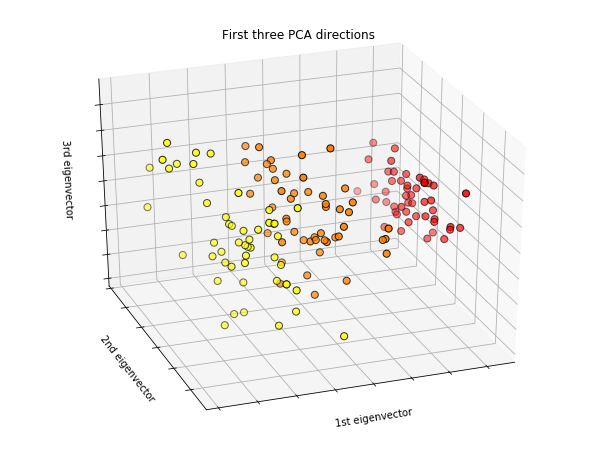

In [3]:
# Création figure 3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Décomposition en composantes principales
X_reduced = PCA(n_components=3).fit_transform(iris.data)

# Représentation du dataset selon les 3 premiers features
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris_y,
           cmap=plt.cm.autumn, edgecolor='k', s=50)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Séparation de la data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.33)

## Optimisation du nombre de voisin

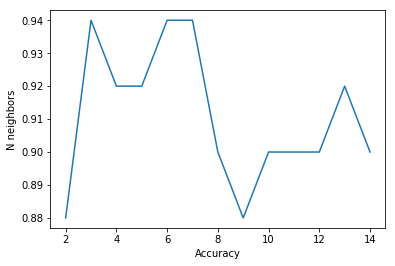

In [5]:
accuracy_score = []

for k in range(2,15):
    
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    accuracy_score.append(knn.score(X_test,y_test))
plt.xlabel("Accuracy")
plt.ylabel("N neighbors")
plt.plot(range(2,15),accuracy_score)
plt.show()

## Création du modèle avec k optimal

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 
knn.predict(X_test)
knn.score(X_test,y_test)

0.94

## Clusterisation - utilisation du K Mean

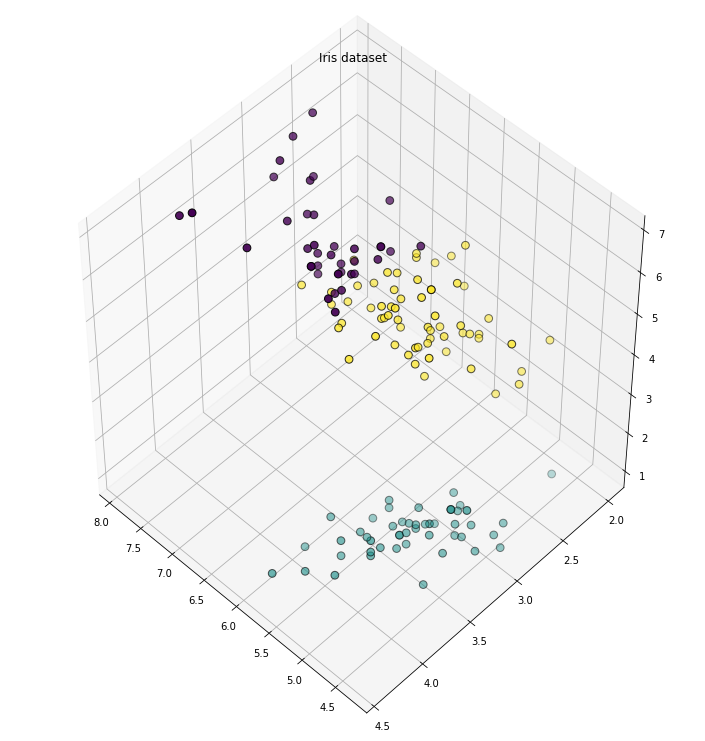

In [7]:
X = iris_X
k_means = KMeans(n_clusters=3)
k_means.fit(X)
y_kmeans = k_means.predict(X)

fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.title("Iris dataset")
labels = k_means.labels_

ax.scatter(X[:,0],X[:,1],X[:,2], c = y_kmeans, edgecolors="k", s = 60)

## Chargement d'un deuxième dataset

In [8]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('data.csv')

In [9]:
encoder = LabelEncoder()

for col in data.columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
X = data.iloc[:,1:23]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

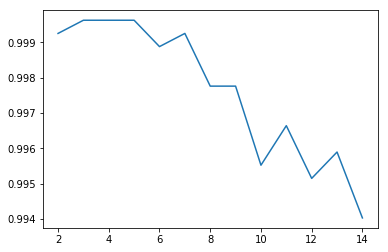

1


In [11]:
accuracy = []
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    accuracy.append(knn.score(X_test,y_test))

plt.plot(range(2,15),accuracy)
plt.show()
print(np.argmax(accuracy))

## Sélection automatique du k optimal

In [12]:
arg_max = np.argmax(accuracy)
k = arg_max + 2
knn_optimized = KNeighborsClassifier(k)
knn_optimized.fit(X_train,y_train)
knn_optimized.score(X_test,y_test)

0.999627004848937

## Chargement dataset diabetes

In [19]:
diabetes = datasets.load_wine()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
print(diabetes.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,y_diabetes,test_size=0.33)

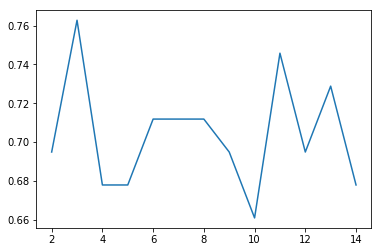

In [21]:
accuracy = []
for k in range(2,15):
    
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    accuracy.append(knn.score(X_test,y_test))
plt.plot(range(2,15),accuracy)
plt.show()